## Data Analysis from Airbnb Open Dataset

- This is a data analysis from a Airbnb dataset avaible at: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata;

- The following Airbnb activity is included in this New York dataset: Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments Calendar, including listing id and the price and availability for that day;

- This dataset describes the listing activity of homestays in New York City. Detailed description of the data in: https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz


### Analysis steps and questions to answer:
1) Data Cleaning;

2) The average price and the most popular airbnb hosts;

3) What is the average price at Brooklyn and Manhattan?


In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# update the data file
df = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\stiag\AppData\Local\Temp\ipykernel_8236\2379178707.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [3]:
# Data exploring
df.head(-5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102589,6089676,Lrg room 1 block from Prospect Park,74549151787,unconfirmed,Dave,Brooklyn,Flatbush,40.65231,-73.96189,United States,...,$61,3.0,0.0,NaN,NaN,1.0,1.0,200.0,House Rules 1. Check-in is 4 pm local time. If...,NaN
102590,6090228,Wonderful artists' loft in Brooklyn,9184535139,unconfirmed,Daniel,Brooklyn,Crown Heights,40.66673,-73.96127,United States,...,$50,1.0,0.0,NaN,NaN,1.0,1.0,276.0,#NAME?,NaN
102591,6090781,Columbus Ave Apt 1 block from Park,50908010324,verified,Lawrence,Manhattan,Upper West Side,40.77408,-73.98181,United States,...,$228,5.0,17.0,1/4/2019,0.35,5.0,1.0,134.0,#NAME?,NaN
102592,6091333,3BR/1 Ba in TriBeCa w/ outdoor deck,53266862889,unconfirmed,Nick,Manhattan,Tribeca,40.71845,-74.01183,United States,...,$157,1.0,0.0,NaN,NaN,2.0,1.0,177.0,Guests should treat my home as if it were thei...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
# I will drop some columns that I won't use in this analysis
columns_to_delete = ['NAME', 'country', 'country code', 'license']
df = df.drop(columns=columns_to_delete)

In [6]:
# Checking null data
df.isnull().sum()

id                                    0
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                       52131
dtype: int64

In [7]:
df = df.drop(columns=['house_rules'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   host id                         102599 non-null  int64  
 2   host_identity_verified          102310 non-null  object 
 3   host name                       102193 non-null  object 
 4   neighbourhood group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room type                       102599 non-null  object 
 11  Construction year               102385 non-null  float64
 12  price           

In [9]:
df['price']

0           $966 
1           $142 
2           $620 
3           $368 
4           $204 
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [10]:
# Okay, so the first step is to calculate the price average and the top hosts
df['price'] = df['price'].astype(str).str.replace(r'[$]', '', regex=True)

In [11]:
df['price'] = df['price'].astype(str).str.replace(r',', '', regex=True).astype(float)

In [12]:
df['price'].describe()

count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

In [16]:
df['price'].mean()

np.float64(625.2935360325152)

In [17]:
df['price'].median()

np.float64(624.0)

<Axes: xlabel='price', ylabel='Count'>

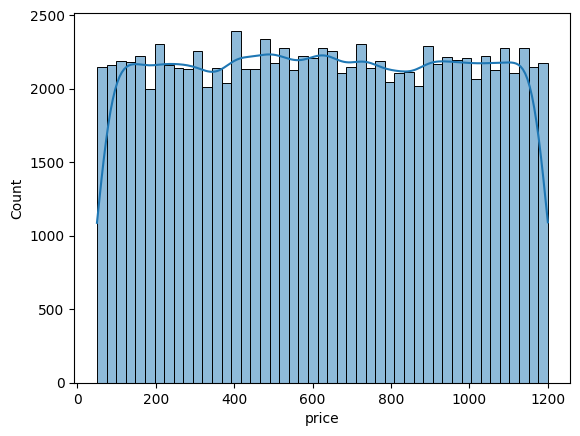

In [13]:
sns.histplot(df['price'], kde=True)

In [20]:
# IWR -> Distância inter quartil (ou "inter quantile range")

q1 = df['price'].quantile(0.25) ## Primeiro quartil
q3 = df['price'].quantile(0.75) ## Terceiro quartil

IQR = q3 - q1
print(f'IQR: {IQR}')

IQR: 573.0


In [21]:
price_outliers = df[(df['price'] < q1 - (IQR * 1.5)) | (df['price'] > q3 + (IQR * 1.5))]
price_outliers

,id,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365


In [22]:
# There is no outliers

In [24]:
df['price'].isnull().sum()

np.int64(247)

In [27]:
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 102599 entries, 0 to 102598
Series name: price
Non-Null Count   Dtype  
--------------   -----  
102352 non-null  float64
dtypes: float64(1)
memory usage: 801.7 KB


In [ ]:
# There are some null values (around 247), but there are only a few of them. So I will take the approach of replacing it with the median of prices.
df['price'].fillna(df['price'].median(), inplace=True)

In [29]:
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 102599 entries, 0 to 102598
Series name: price
Non-Null Count   Dtype  
--------------   -----  
102599 non-null  float64
dtypes: float64(1)
memory usage: 801.7 KB


In [30]:
df['price'].describe()

count    102599.000000
mean        625.290422
std         331.272137
min          50.000000
25%         341.000000
50%         624.000000
75%         912.000000
max        1200.000000
Name: price, dtype: float64

In [31]:
# So we have the average price that airbnb hosts are offering is around $625.00

In [32]:
# Now, I will try to group the most popular airbnb hosts and try to verify if the 'price' has some relationship with the best hosts
top_hosts = df['host name'].value_counts()
ranking_hosts = top_hosts.reset_index()
ranking_hosts.columns = ['host name', 'count']

print(ranking_hosts)

           host name  count
0            Michael    881
1              David    764
2               John    581
3               Alex    546
4       Sonder (NYC)    516
...              ...    ...
13185         Renuka      1
13186      Kyeong Il      1
13187         Braily      1
13188  Lars Byrresen      1
13189     Risa&Jacky      1

[13190 rows x 2 columns]


In [ ]:
# Let's explore the relationship between top hosts and general prices
top_hosts_by_price = df.groupby(['host name'])['price'].sum().reset_index()
top_hosts_by_price

,host name,price
0,#NAME?,756.0
1,'Cil,569.0
2,(Ari) HENRY LEE,2358.0
3,(Email hidden by Airbnb),2744.0
4,(Mary) Haiy,1860.0
...,...,...
13185,단비,822.0
13186,빈나,1836.0
13187,소정,1996.0
13188,진,992.0


In [44]:
result_host_price_sorted = top_hosts_by_price.sort_values(by='price', ascending=False).reset_index()
result_host_price_sorted

,index,host name,price
0,8166,Michael,580192.0
1,2721,David,492923.0
2,5727,John,362820.0
3,364,Alex,340222.0
4,11249,Sonder (NYC),318150.0
...,...,...,...
13185,8544,Muni,51.0
13186,10600,Sarmad,51.0
13187,10304,Rubie,51.0
13188,10029,Rhett,50.0


In [55]:
top_10_hosts = result_host_price_sorted.head(10)
top_10_hosts

,index,host name,price
0,8166,Michael,580192.0
1,2721,David,492923.0
2,5727,John,362820.0
3,364,Alex,340222.0
4,11249,Sonder (NYC),318150.0
5,2610,Daniel,310705.0
6,6135,Karen,283883.0
7,10574,Sarah,269451.0
8,7662,Maria,261742.0
9,812,Anna,250446.0


In [34]:
# Now let's observe the hosts ranking by their mean price sales
hosts_by_mean_price = df.groupby(['host name'])['price'].mean().reset_index()
hosts_by_mean_price = hosts_by_mean_price.sort_values(by='price', ascending=False)

print(hosts_by_mean_price)

            host name   price
2283         Chun Kit  1200.0
5446        Jeff & TJ  1200.0
9966             Rema  1200.0
3563            Esaie  1200.0
917           Antonin  1200.0
...               ...     ...
8544             Muni    51.0
10600          Sarmad    51.0
5138             J.Y.    51.0
10029           Rhett    50.0
3119   Drew & Kristen    50.0

[13190 rows x 2 columns]


In [56]:
ranking_hosts_by_mean = hosts_by_mean_price.head(10)
ranking_hosts_by_mean

,host name,price
2283,Chun Kit,1200.0
5446,Jeff & TJ,1200.0
9966,Rema,1200.0
3563,Esaie,1200.0
917,Antonin,1200.0
4897,Ilean,1200.0
2853,Denae,1200.0
5116,J And Lana,1199.0
340,Alejandrina,1199.0
8542,Muneeza,1199.0


In [ ]:
# Okay, now we have the ranking of the top Hosts and we can see that they are also the ones who own the greates final volume of sales, but there is something interesting here. In this case, we see a significant discrepancy between the average price ranking and the total sales ranking. This could be a sign that there are differences in pricing strategies among the hosts. Some may opt for lower prices to attract more customers, while others prefer higher prices with fewer customers, but resulting in higher profit per transaction maybe there is an indicative there. Let's now investigate why those guys are top hosts in each situation (average price ranking and total sales ranking)

np.float64(1200.0)

In [69]:
# Let´s examine 'michael' 'david' 'john' 'alex'
df_top_hosts = df.loc[(df['host name'] == 'David')].reset_index()

df_top_hosts.describe()

,index,id,host id,lat,long,Construction year,price,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,764.000000,7.640000e+02,7.640000e+02,764.000000,764.000000,762.000000,764.000000,763.000000,762.000000,619.000000,760.000000,762.000000,762.000000
mean,50721.498691,2.889009e+07,5.006675e+10,40.731300,-73.954596,2012.421260,645.187173,10.251638,23.345144,1.437286,3.221053,2.311024,142.434383
std,30301.657208,1.666371e+07,2.797150e+10,0.053013,0.045933,5.797704,325.352557,33.243745,44.953155,1.793396,1.279649,2.849093,139.654197
min,46.000000,1.026742e+06,1.949766e+08,40.569310,-74.159540,2003.000000,50.000000,1.000000,0.000000,0.020000,1.000000,1.000000,-10.000000
25%,24159.750000,1.430693e+07,2.684523e+10,40.694870,-73.984565,2007.000000,375.500000,2.000000,1.000000,0.250000,2.000000,1.000000,0.000000
50%,46604.500000,2.673934e+07,5.092993e+10,40.727610,-73.960280,2012.000000,625.000000,3.000000,7.000000,0.660000,3.000000,1.000000,89.000000
75%,78564.750000,4.403835e+07,7.349703e+10,40.765773,-73.938555,2018.000000,934.250000,5.000000,23.000000,1.900000,4.000000,2.000000,280.000000
max,102504.000000,5.734201e+07,9.870352e+10,40.872710,-73.751160,2022.000000,1199.000000,365.000000,387.000000,10.000000,5.000000,12.000000,423.000000


In [ ]:
(df['host name'] == 'David') | (df['host name'] == 'John') | (df['host name'] == 'Alex') | (df['host name'] == 'Sonder (NYC)') | (df['host name'] == 'Daniel') | (df['host name'] == 'Karen')

In [53]:
# Now let´s investigate about the top 5 hosts by their mean price (Chun Kit, Jeff & TJ, Rema, Esaie, Antonin, Ilean, Denae)
df_top_median_hosts = df.loc[(df['host name'] == 'Chun Kit') | (df['host name'] == 'Jeff & TJ') | (df['host name'] == 'Rema') | (df['host name'] == 'Esaie') | (df['host name'] == 'Antonin') | (df['host name'] == 'Ilean') | (df['host name'] == 'Denae')]

df_top_median_hosts.value_counts()

id        host id      host_identity_verified  host name  neighbourhood group  neighbourhood       lat       long       instant_bookable  cancellation_policy  room type        Construction year  price   service fee  minimum nights  number of reviews  last review  reviews per month  review rate number  calculated host listings count  availability 365
35580287  32202051101  unconfirmed             Chun Kit   Staten Island        Shore Acres         40.61126  -74.06789  False             strict               Private room     2019.0             1200.0  $240         1.0             5.0                11/7/2021    0.59               5.0                 1.0                             0.0                 2
6416638   40836583876  unconfirmed             Ilean      Brooklyn             Bedford-Stuyvesant  40.68346  -73.95551  False             strict               Private room     2017.0             1200.0  $240         2.0             30.0               4/30/2019    1.97               1.0     

In [20]:
## This section is important when I will investigate about the correlation between the most valueable hosts and why they are in this position

### I can't forget to treat the null data from the reviews

# df_numeric = df.select_dtypes(include=['number'])


In [76]:
# Top Places airbnb at NYC
top_places = df['neighbourhood group'].value_counts()
ranking_places = top_places.reset_index()
ranking_places.columns = ['neighbourhood', 'count']

print(ranking_places)


   neighbourhood  count
0      Manhattan  43792
1       Brooklyn  41842
2         Queens  13267
3          Bronx   2712
4  Staten Island    955
5        brookln      1
6       manhatan      1


In [90]:
# Replacing the wrong values of 'bookln' and 'manhatan'
df['neighbourhood group'] = df['neighbourhood group'].replace({
    'brookln': 'Brooklyn',
    'manhatan': 'Manhattan'
})


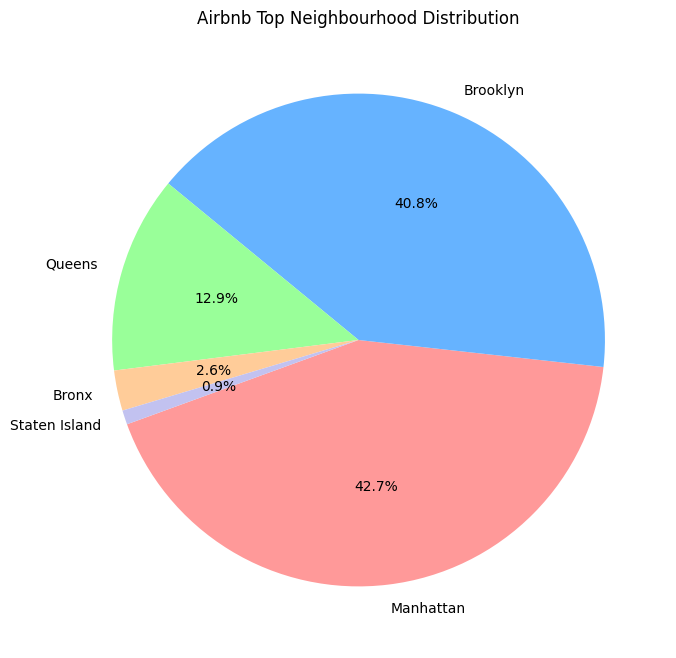

In [ ]:
# Pie Chart about it!
top_places = df['neighbourhood group'].value_counts(normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(top_places, labels=top_places.index, autopct='%1.1f%%', startangle=200, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title("Airbnb Top Neighbourhood Distribution")
plt.show()

In [92]:
# Let's explore the relationship between top places and general prices
top_places_by_price = df.groupby(['neighbourhood group'])['price'].sum().reset_index()
top_places_by_price

,neighbourhood group,price
0,Bronx,1702476.0
1,Brooklyn,26216957.0
2,Manhattan,27258534.0
3,Queens,8360760.0
4,Staten Island,596387.0


In [93]:
ranking_places_by_price = top_places_by_price.sort_values(by='price', ascending=False).reset_index()
ranking_places_by_price

,index,neighbourhood group,price
0,2,Manhattan,27258534.0
1,1,Brooklyn,26216957.0
2,3,Queens,8360760.0
3,0,Bronx,1702476.0
4,4,Staten Island,596387.0


In [94]:
# These are the most popular airbnb places in New York: 1st Manhattan, 2nd Brooklyn, 3rd Queens and 4th Bronx, 5th Staten Island. 

In [95]:
top_places_by_mean_price = df.groupby(['neighbourhood group'])['price'].mean().reset_index()
top_places_by_mean_price

,neighbourhood group,price
0,Bronx,627.756637
1,Brooklyn,626.555386
2,Manhattan,622.440436
3,Queens,630.192206
4,Staten Island,624.489005


In [96]:
ranking_places_by_mean_price = top_places_by_mean_price.sort_values(by='price', ascending=False).reset_index()
ranking_places_by_mean_price

,index,neighbourhood group,price
0,3,Queens,630.192206
1,0,Bronx,627.756637
2,1,Brooklyn,626.555386
3,4,Staten Island,624.489005
4,2,Manhattan,622.440436


In [97]:
top_places_by_median_price = df.groupby(['neighbourhood group'])['price'].median().reset_index()
top_places_by_median_price

,neighbourhood group,price
0,Bronx,630.5
1,Brooklyn,625.0
2,Manhattan,623.0
3,Queens,626.0
4,Staten Island,628.0


In [98]:
# There is interesting, one more time some places have a most valuable prices than others when we are looking through the average price.

In [99]:
# INVESTIGAR MELHOR A DIFERENÇA DE PREÇO NESSES BAIRROS, O QUE ISSO PODE SIGNIFICAR